In [1]:
from AGMOEA import AGMOEA
from WFGEvaluator import WFGEvaluator

In [2]:
crossover_parameters = {
    'sbx': {'eta': 20},
    'pcx': {'sigma': 0.1, 'eta': 0.1},
    'spx': {'epsilon': 1},
    'blx_alpha': {'alpha': 0.5},
    'de_rand_1': {'cr': 1,'f': 0.5}
}

In [3]:
NP = 300
K = 5
NGBA = 10
NEXA = 300
Tmax = 300
FETmax = 30000
N = 25
M = 3

In [4]:
NP = 100
K = 5
NGBA = 10
NEXA = 100
Tmax = 250
FETmax = 25000
N = 30
M = 2

In [8]:
problem_name = 'wfg2'
evaluator = WFGEvaluator(problem_name, N,M,4)

In [9]:
pareto_fronts = []
for i in range(5):
    print(f"----run {i}---")
    agmoea = AGMOEA(NP, K, NGBA, NEXA, Tmax, FETmax, evaluator, crossover_parameters, N, M)
    agmoea.agmoea_algorithm()
    pareto_fronts.append(agmoea.EXA)

----run 0---
so far:  100
so far:  400
----run 1---
so far:  100
so far:  18900
----run 2---
so far:  100
so far:  900
so far:  6300
----run 3---
so far:  100
so far:  3600
so far:  14000
so far:  16700
so far:  19400
----run 4---
so far:  100


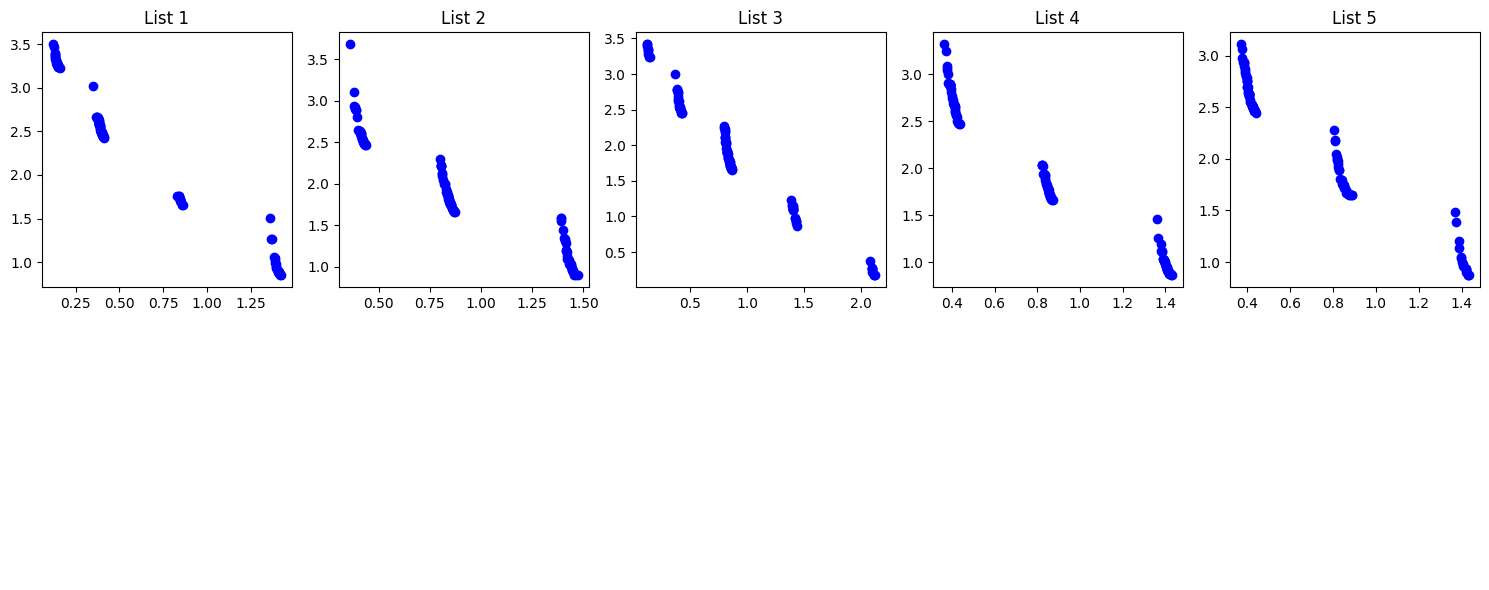

In [11]:
import matplotlib.pyplot as plt


num_rows = 2
num_cols = 5

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Flatten the axs array to iterate over all subplots
axs = axs.flatten()

# Loop through the lists and plot them
for i, agmoea_list in enumerate(pareto_fronts):
    x_values = [item.objectives[0] for item in agmoea_list]
    y_values = [item.objectives[1] for item in agmoea_list]
    axs[i].scatter(x_values, y_values, marker='o', color='b')
    axs[i].set_title('List {}'.format(i+1))

# Hide any empty subplots
for j in range(len(pareto_fronts), num_rows*num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


[ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34. 36.
 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60.]


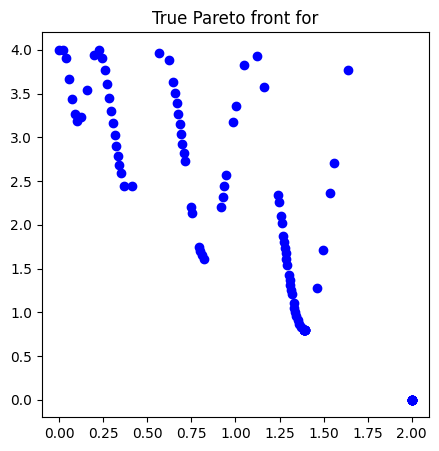

In [41]:
from pymoo.problems.many.wfg import WFG2
wfg2 = WFG2(n_var=30, n_obj=2)
true_pareto = wfg2.pareto_front()
plt.figure(figsize=(5, 5))
x_values = [item[0] for item in true_pareto]
y_values = [item[1] for item in true_pareto]
plt.scatter(x_values, y_values, marker='o', color='b')
plt.title('True Pareto front for')
plt.show()

In [44]:
for low,high in zip(wfg2.xl,wfg2.xu):
    print((low,high))

(0.0, 2.0)
(0.0, 4.0)
(0.0, 6.0)
(0.0, 8.0)
(0.0, 10.0)
(0.0, 12.0)
(0.0, 14.0)
(0.0, 16.0)
(0.0, 18.0)
(0.0, 20.0)
(0.0, 22.0)
(0.0, 24.0)
(0.0, 26.0)
(0.0, 28.0)
(0.0, 30.0)
(0.0, 32.0)
(0.0, 34.0)
(0.0, 36.0)
(0.0, 38.0)
(0.0, 40.0)
(0.0, 42.0)
(0.0, 44.0)
(0.0, 46.0)
(0.0, 48.0)
(0.0, 50.0)
(0.0, 52.0)
(0.0, 54.0)
(0.0, 56.0)
(0.0, 58.0)
(0.0, 60.0)


In [22]:
true_pareto = wfg2.pareto_front()
plt.figure(figsize=(5, 5))
x_values = [item[0] for item in true_pareto]
y_values = [item[1] for item in true_pareto]
plt.scatter(x_values, y_values, marker='o', color='b')
plt.title('True Pareto front for')
plt.show()

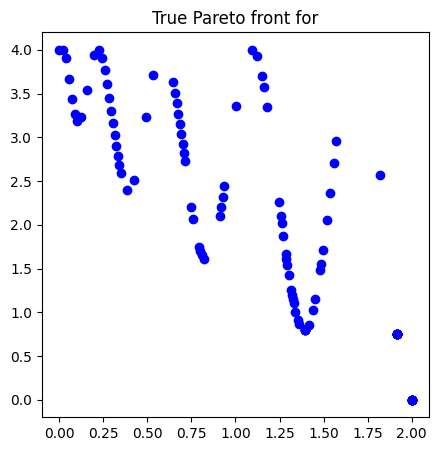

In [23]:
plt.figure(figsize=(5, 5))
x_values = [item[0] for item in true_pareto]
y_values = [item[1] for item in true_pareto]
plt.scatter(x_values, y_values, marker='o', color='b')
plt.title('True Pareto front for')
plt.show()

In [34]:
import optproblems

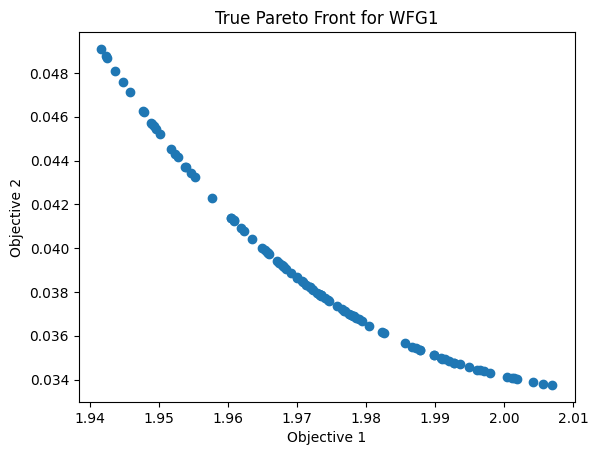

In [55]:
import matplotlib.pyplot as plt
import optproblems.wfg
import numpy as np
# Create an instance of WFG1 with 2 objectives
num_objectives = 2
num_variables = 30
k = 15
func = optproblems.wfg.WFG1(num_objectives, num_variables, k)

# Generate a set of Pareto-optimal solutions
pareto_solutions = []
for _ in range(100):
    # Generate diverse position parameters by sampling uniformly from the feasible range
    pos_params = np.random.rand(k).tolist()  # This generates a list of k random values
    l = num_variables - k
    phenotype = func.optimal_solution(k, l, pos_params).phenome
    pareto_solutions.append(phenotype)

# Extract objective values
objective_values = [func.objective_function(sol) for sol in pareto_solutions]

# Separate objective values for plotting
objective_1_values = [val[0] for val in objective_values]
objective_2_values = [val[1] for val in objective_values]

# Plotting
plt.scatter(objective_1_values, objective_2_values)
plt.title('True Pareto Front for WFG1')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.show()


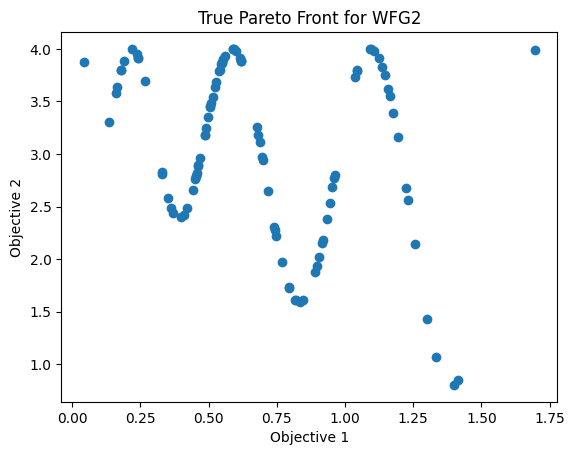

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import optproblems.wfg

# Create an instance of WFG2 with 2 objectives
num_objectives = 2
num_variables = 30
k = 4  # k should be less than num_variables and should be a multiple of (num_objectives - 1)
func = optproblems.wfg.WFG2(num_objectives, num_variables, k)

# Generate a set of Pareto-optimal solutions
pareto_solutions = []
for _ in range(100):
    # Generate diverse position parameters by sampling uniformly from the feasible range
    # For WFG2, make sure that the position parameters satisfy the problem's constraints
    pos_params = np.random.rand(k).tolist()  # Generate k random values between 0 and 1
    l = num_variables - k
    phenotype = func.optimal_solution(k, l, pos_params).phenome
    pareto_solutions.append(phenotype)

# Extract objective values
objective_values = [func.objective_function(sol) for sol in pareto_solutions]

# Separate objective values for plotting
objective_1_values = [val[0] for val in objective_values]
objective_2_values = [val[1] for val in objective_values]

# Plotting
plt.scatter(objective_1_values, objective_2_values)
plt.title('True Pareto Front for WFG2')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.show()
